# This is assignment was done for STL-10 Dataset downloaded from Kaggle.


### In the first part of this assignment I just wanted to work with the photos, check them

In [ ]:
import kagglehub
path = kagglehub.dataset_download("jessicali9530/stl10")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/stl10/versions/3


In [ ]:
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

dataset_path = "/root/.cache/kagglehub/datasets/jessicali9530/stl10/versions/3"

# List all files in the dataset directory to understand what is going on
files = os.listdir(dataset_path)
print(files)


['test_images', 'train_images', 'unlabeled_images']


In [ ]:
# List files in each subdirectory
subdirs = ['test_images', 'train_images', 'unlabeled_images']
file_paths = {}

# Loop through each subdirectory and list files
for subdir in subdirs:
    subdir_path = os.path.join(dataset_path, subdir)
    files = os.listdir(subdir_path)
    file_paths[subdir] = files

# Print file paths for each subdirectory
for subdir, files in file_paths.items():
    print(f"Files in {subdir}: {files[:2]}")  #to check the name of files


Files in test_images: ['test_image_png_6704.png', 'test_image_png_7277.png']
Files in train_images: ['train_image_png_4100.png', 'train_image_png_1573.png']
Files in unlabeled_images: ['unlabeled_image_png_21496.png', 'unlabeled_image_png_56556.png']


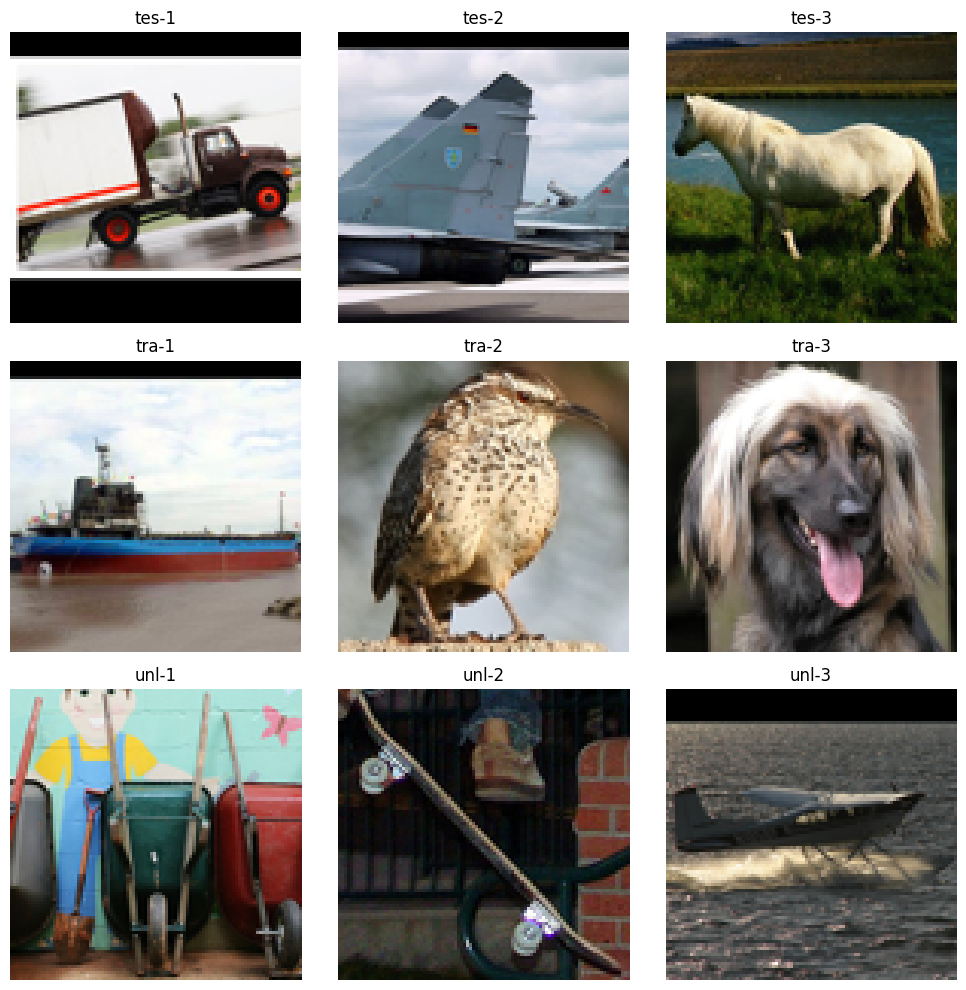

In [ ]:
import random

plt.figure(figsize=(10, 10))
for idx, subdir in enumerate(subdirs):
    subdir_path = os.path.join(dataset_path, subdir)

    # Select 3 random images from the list of filenames in the subdirectory
    random_files = random.sample(file_paths[subdir], min(3, len(file_paths[subdir])))

    for i, filename in enumerate(random_files):
        file_path = os.path.join(subdir_path, filename)

        img = Image.open(file_path)

        plt.subplot(len(subdirs), 3, i + 1 + idx * 3)
        plt.imshow(img)
        plt.title(f"{subdir[:3]}-{i+1}")
        plt.axis('off')

plt.tight_layout()
plt.show()

## From there it is the real tasks of the assignment.


Reduced to 209 components.


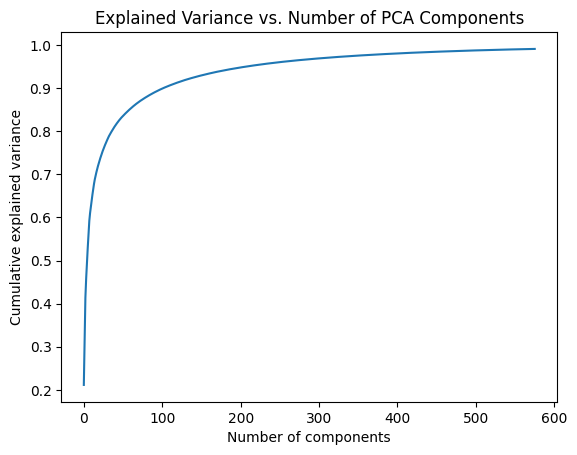

In [ ]:
# Feature Extraction Function
def extract_features(image_path, image_size=24):
    img = Image.open(image_path)
    img = img.resize((image_size, image_size))
    return np.array(img).flatten()

# Load Dataset and Extract Features
def load_and_process_images(subdirs, dataset_path, image_size=32):
    all_features = []
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_path, subdir)
        for filename in file_paths[subdir]:
            file_path = os.path.join(subdir_path, filename)
            features = extract_features(file_path, image_size=image_size)
            all_features.append(features)
    return np.array(all_features)

# Preprocessing and PCA
def preprocess_and_pca(features, variance_threshold=0.95):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    pca = PCA(n_components=24**2)
    reduced_features = pca.fit_transform(scaled_features)

    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance >= variance_threshold) + 1

    return reduced_features[:, :n_components], n_components, explained_variance

# Extract and process Images
features = load_and_process_images(subdirs, dataset_path, image_size=24)

# Perform preprocessing and PCA
reduced_features, n_components, explained_variance = preprocess_and_pca(features)

# Display results
print(f"Reduced to {n_components} components.")
plt.plot(explained_variance)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained Variance vs. Number of PCA Components")
plt.show()


### The graph shows how much variance in the dataset is captured as you increase the number of principal components (PCA components). The initial slope indicates that a few components capture most of the variance, while the curve flattens as you add more components.

### So the answer to the question, is hidden dimension of the dataset is 209. After running it several times it gave in range of 203-229. But for the last iteration I got 209. The hidden dimension of the dataset is 209, as it represents the number of features required to retain 95% of the original variance.